In [1]:
import sys,os
import random
import numpy as np
import json
from collections import OrderedDict
from gnn import GNNNet
from utils import *
from emetrics import *
from data_process import create_dataset_for_5folds
import torch
import torch.nn as nn
from torch_geometric.data import DataLoader
import rdkit as rd
from torch_sparse import SparseTensor,transpose
import deepchem
import tensorflow as tf
import pandas as pd
import pickle

import os
import sys
import torch
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from torch_geometric.data import Batch

from emetrics import get_aupr, get_cindex, get_rm2, get_ci, get_mse, get_rmse, get_pearson, get_spearman
from utils import *
from scipy import stats
from gnn import GNNNet
from data_process import create_dataset_for_test,create_dataset_for_test_bootstrap
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from statannotations.Annotator import Annotator

RDKit WARNING: [15:48:53] Enabling RDKit 2019.09.3 jupyter extensions
[15:48:53] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
df=pd.read_csv('pconsc4.csv')
df1=pd.read_csv('random.csv')
df2=pd.read_csv('esm.csv')
df3=pd.read_csv('alpha.csv')
df4=pd.read_csv('pconsc4_mol_graph.csv')

In [3]:
#Pconsc4
P=df['mean']
Y=df['exp']
ers=df['std']
#Random
P1=df1['mean']
Y1=df1['exp']
ers1=df1['std']
#ESM
P2=df1['mean']
Y2=df2['exp']
ers2=df2['std']
#Alpha
P3=df3['mean']
Y3=df3['exp']
ers3=df3['std']
#Pconsc4_Random_Mol_graph
P4=df4['mean']
Y4=df4['exp']
ers4=df4['std']

In [4]:
n = 50  
np.random.seed(21)
index = np.random.choice(len(Y), n, replace=False)  
#Pconsc4
x_random = Y[index] #Predictions list to be set based on the method
y_random = P[index] #Groundtruths list to be set based on the method
ers_random=ers[index]
#Random
x_random1 = Y1[index] 
y_random1 = P1[index] 
ers_random1=ers1[index]
#ESM
x_random2 = Y2[index] 
y_random2 = P2[index] 
ers_random2=ers2[index]
#Alpha
x_random3 = Y3[index] 
y_random3 = P3[index] 
ers_random3=ers3[index]
#Pconsc4_Random_Mol_graph
x_random4 = Y4[index] 
y_random4 = P4[index] 
ers_random4=ers4[index]

In [17]:
sns.set_theme(style="whitegrid")

In [32]:
sns.set(font_scale = 4,style="white")

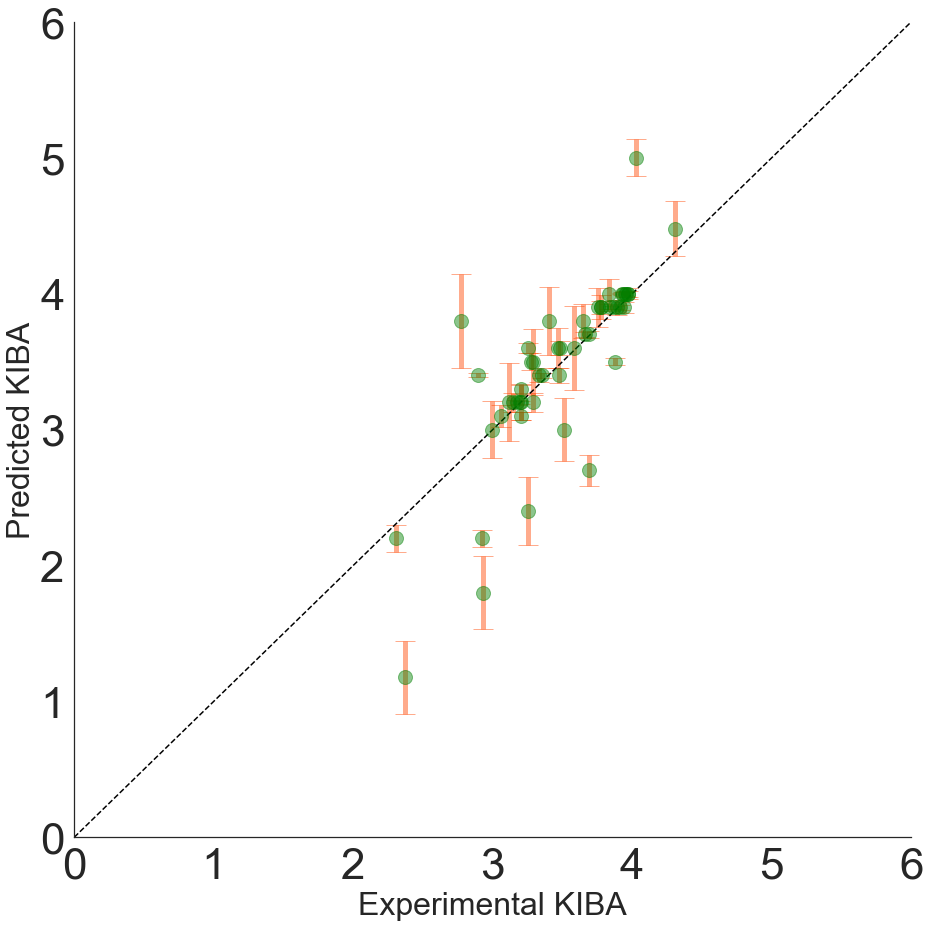

In [34]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(y_random3, x_random3, yerr=ers_random3,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=14,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=32)
ax.set_xlabel('Experimental KIBA',fontsize=32)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
#ax.set_title('Alphafold v/s Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results4',  'Alphafold vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Alphafold vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

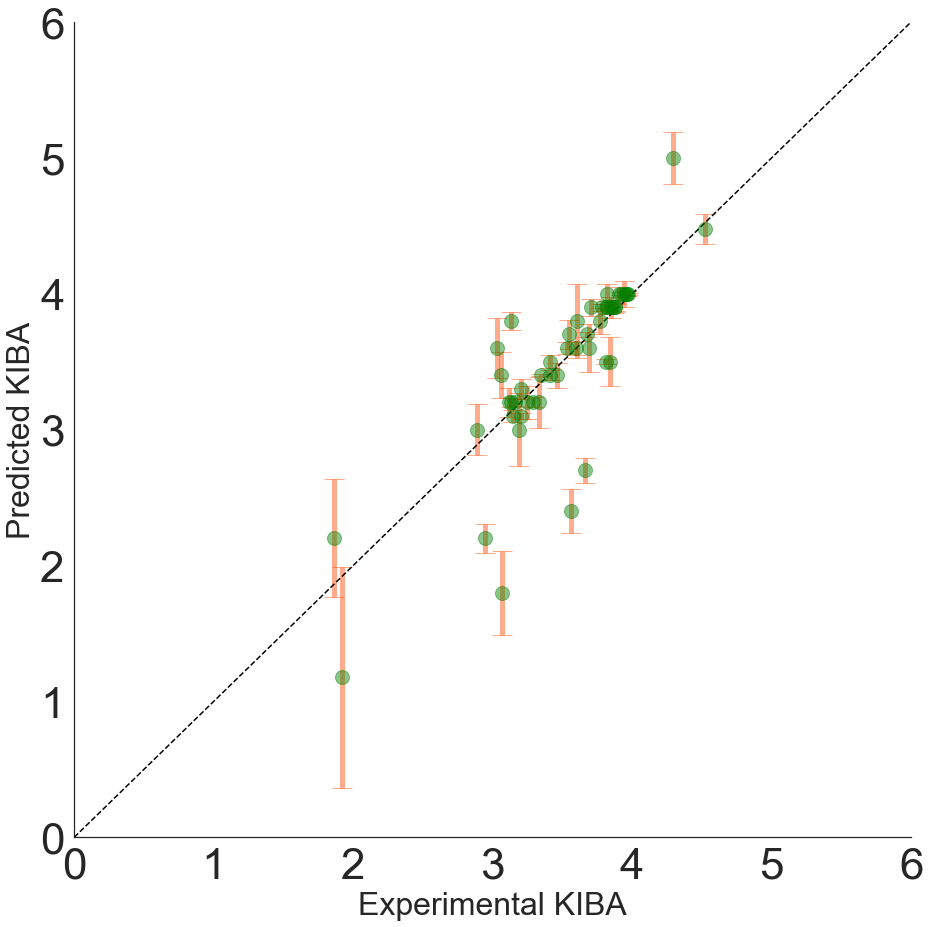

In [35]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(y_random, x_random, yerr=ers_random,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=14,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=32)
ax.set_xlabel('Experimental KIBA',fontsize=32)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
#ax.set_title('Alphafold v/s Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results4',  'Pconsc4 vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Pconsc4 vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

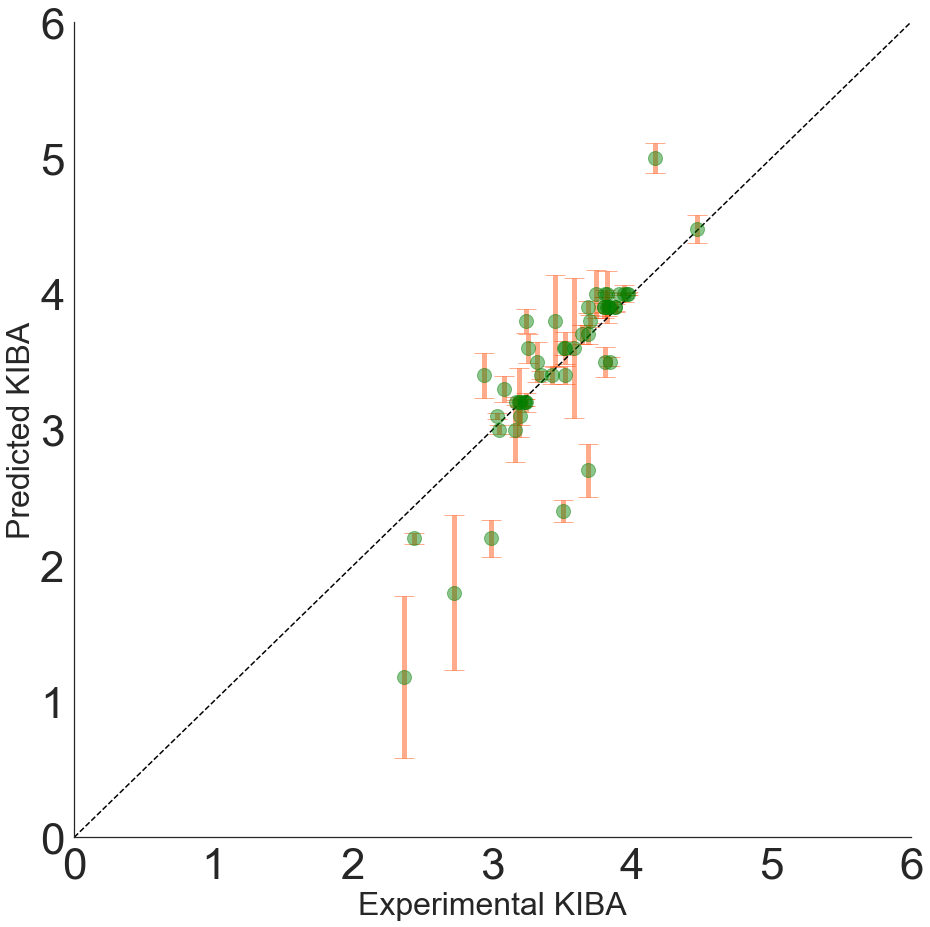

In [36]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(y_random1, x_random1, yerr=ers_random1,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=14,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=32)
ax.set_xlabel('Experimental KIBA',fontsize=32)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
#ax.set_title('Alphafold v/s Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results4',  'Random vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Random vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

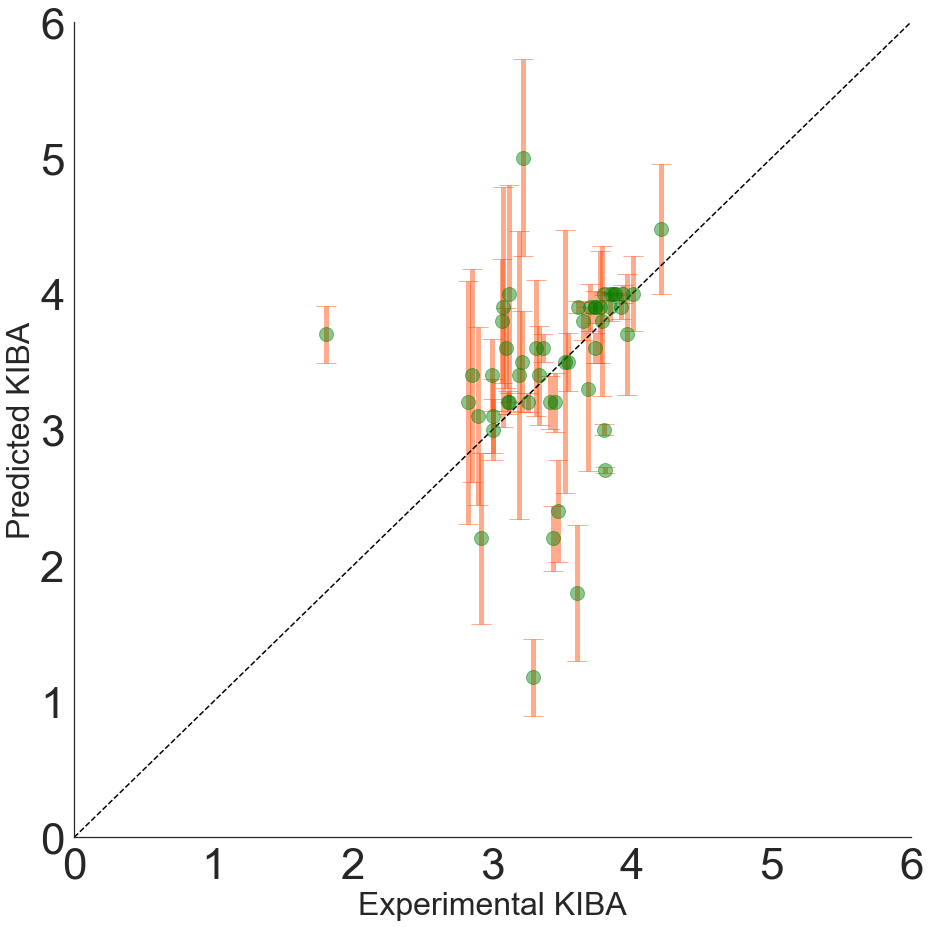

In [38]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(y_random4, x_random4, yerr=ers_random4,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=14,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=32)
ax.set_xlabel('Experimental KIBA',fontsize=32)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
#ax.set_title('Alphafold v/s Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results4',  'Random Mol Graph vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Random Mol Graph vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

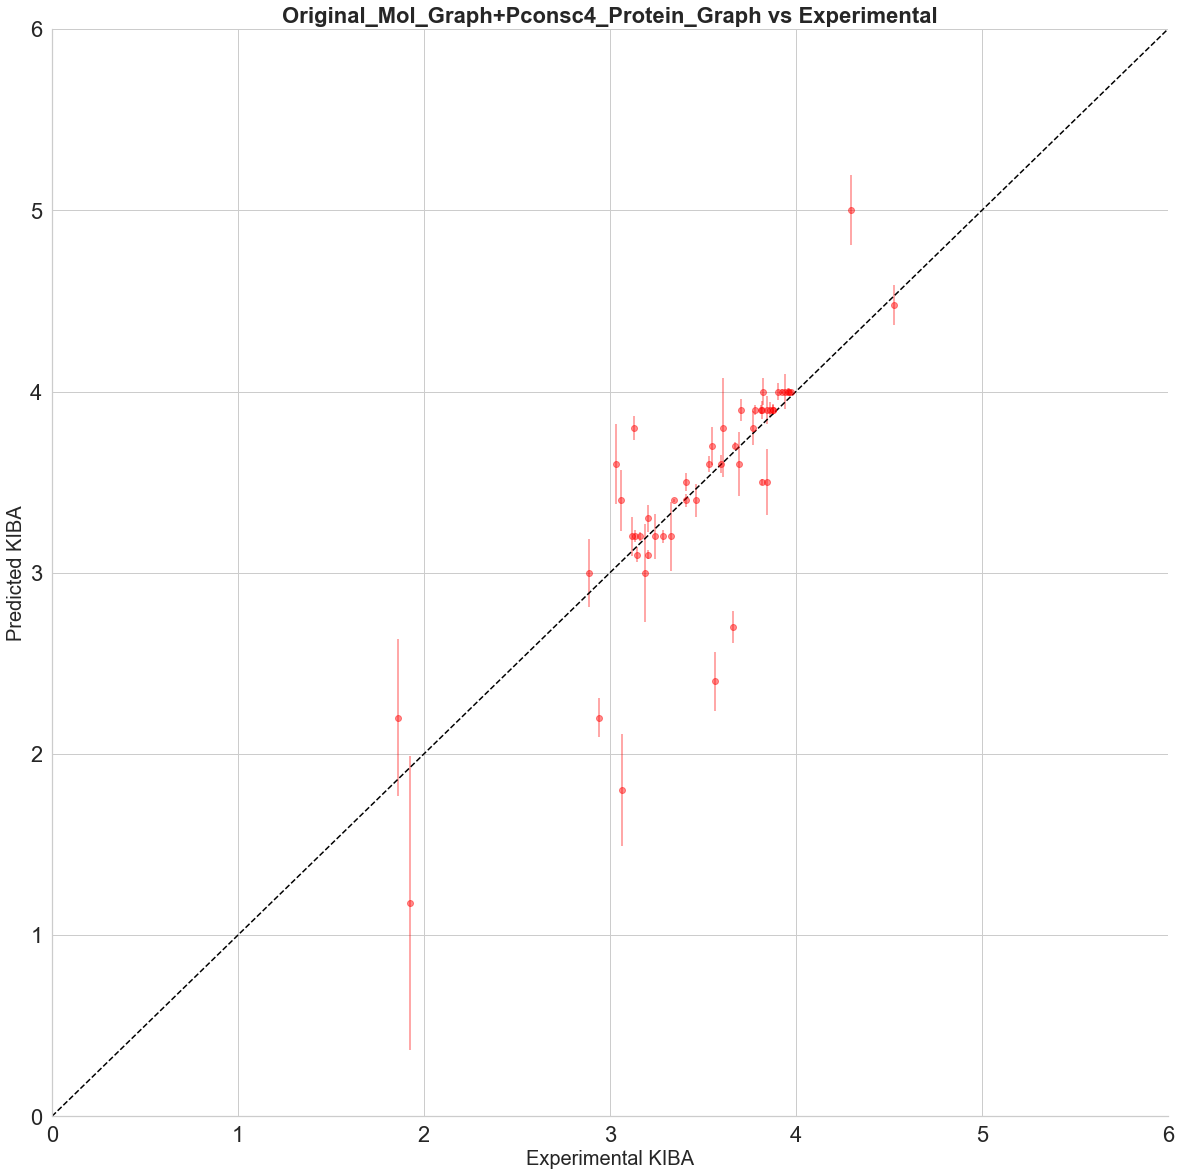

In [29]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.errorbar( y_random, x_random, yerr=ers_random, fmt="o", color="red",alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=20)
ax.set_xlabel('Experimental KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Original_Mol_Graph+Pconsc4_Protein_Graph vs Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'Original_Mol_Graph+Pconsc4_Protein_Graph ' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'Original_Mol_Graph+Pconsc4_Protein_Graph ' + '.pdf'), dpi=500, bbox_inches='tight')

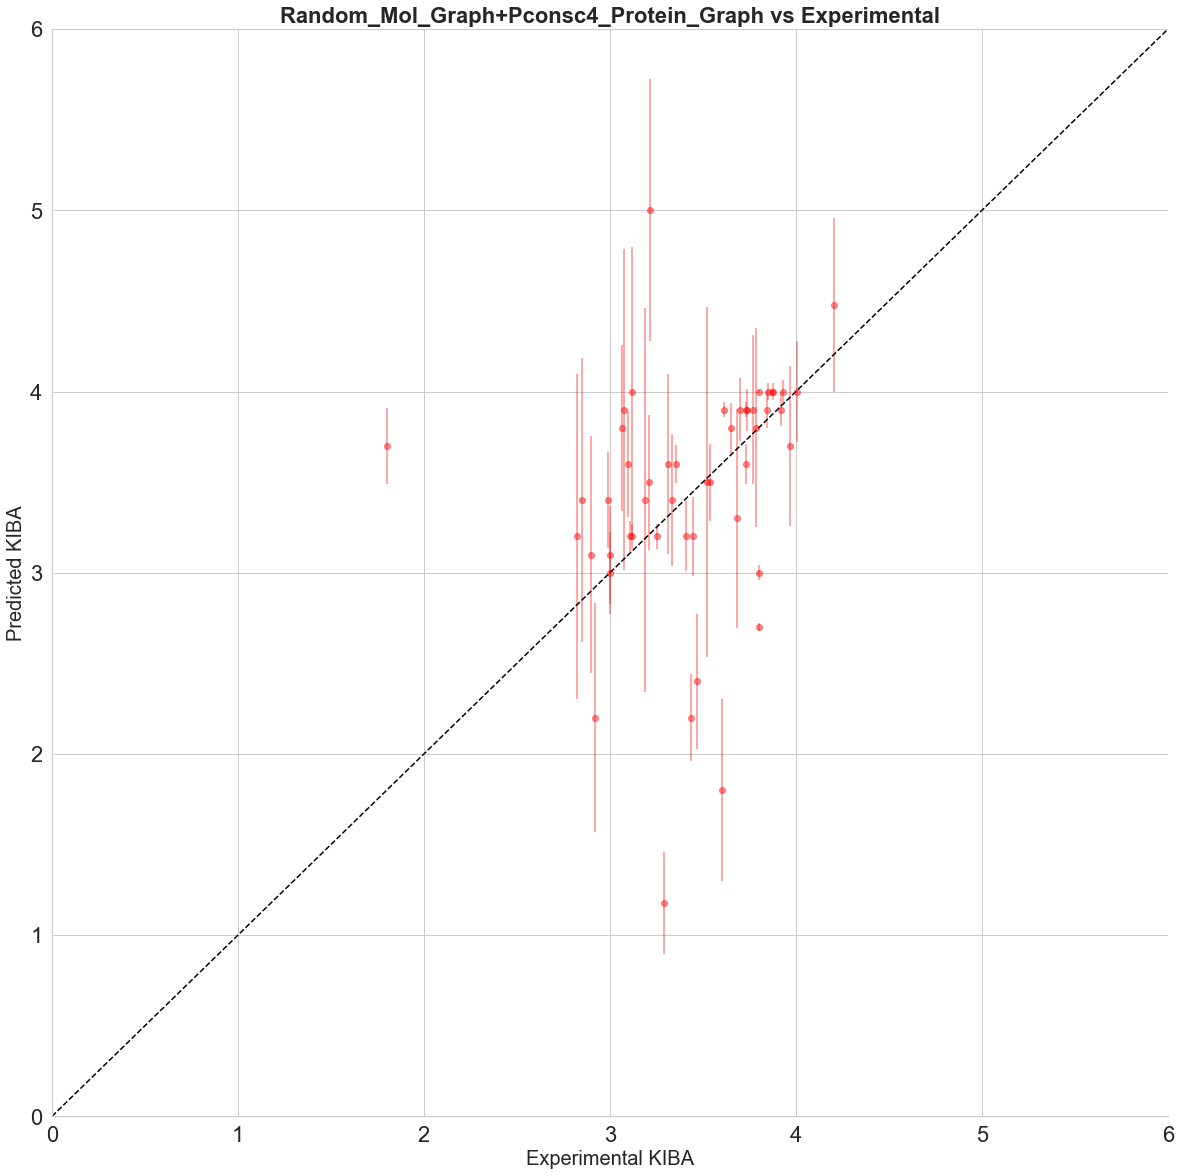

In [33]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.errorbar( y_random4, x_random4, yerr=ers_random4, fmt="o", color="red",alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=20)
ax.set_xlabel('Experimental KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Random_Mol_Graph+Pconsc4_Protein_Graph vs Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'Random_Mol_Graph+Pconsc4_Protein_Graph ' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'Random_Mol_Graph+Pconsc4_Protein_Graph ' + '.pdf'), dpi=500, bbox_inches='tight')

In [35]:
P1=df1['mean']
Y1=df1['exp']
ers1=df1['std']

In [40]:
n = 50  
np.random.seed(21)
index = np.random.choice(len(Y1), n, replace=False)  



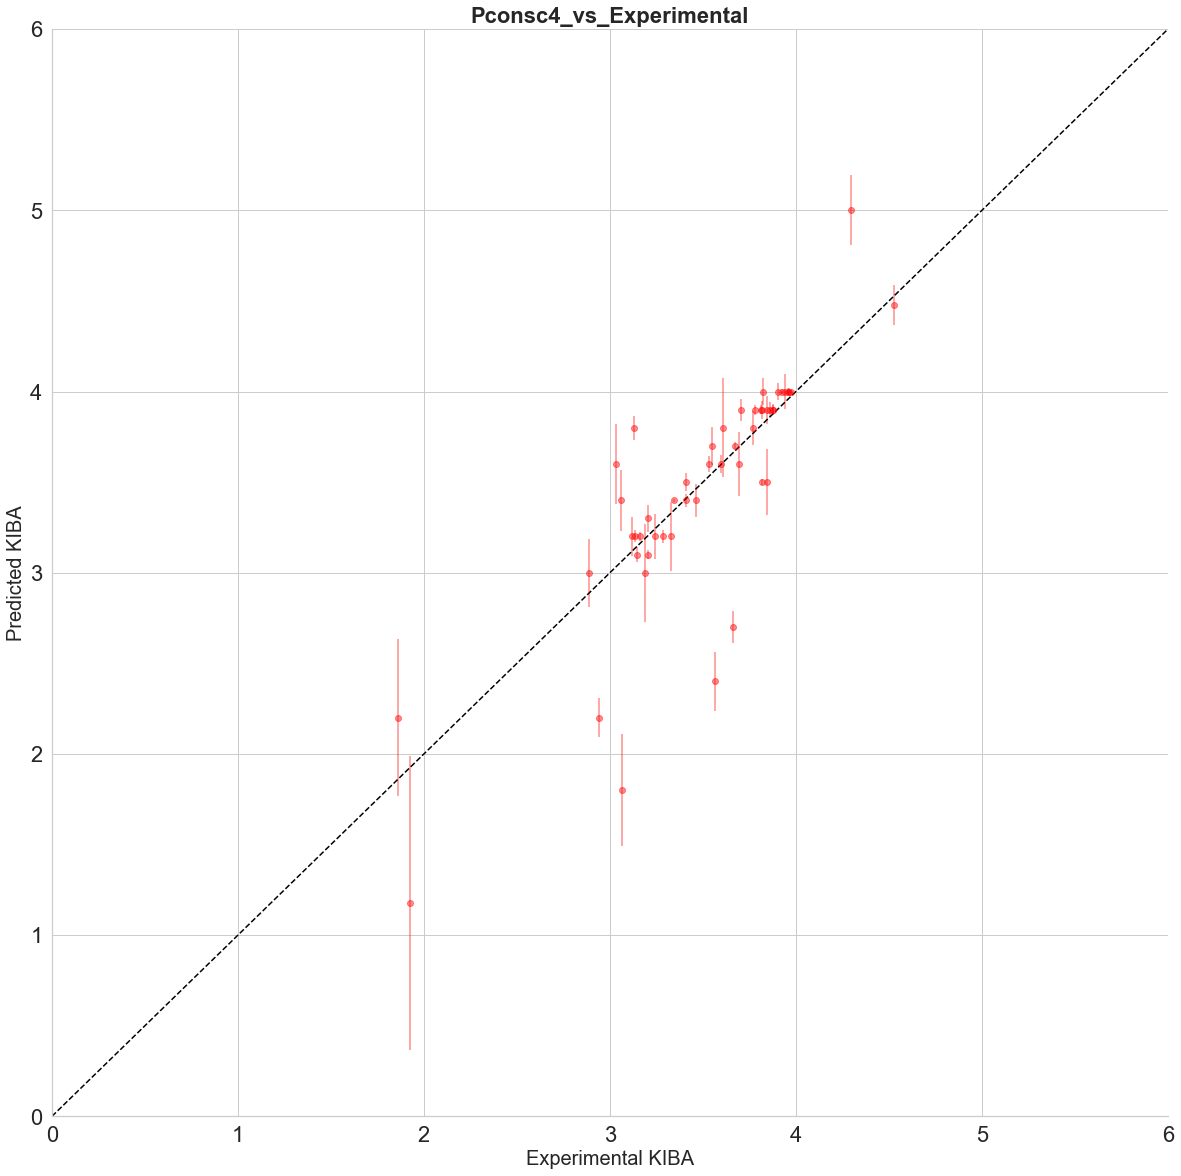

In [35]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.errorbar( y_random, x_random, yerr=ers_random, fmt="o", color="red",alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=20)
ax.set_xlabel('Experimental KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Pconsc4_vs_Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'Pconsc4 vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'Pconsc4 vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

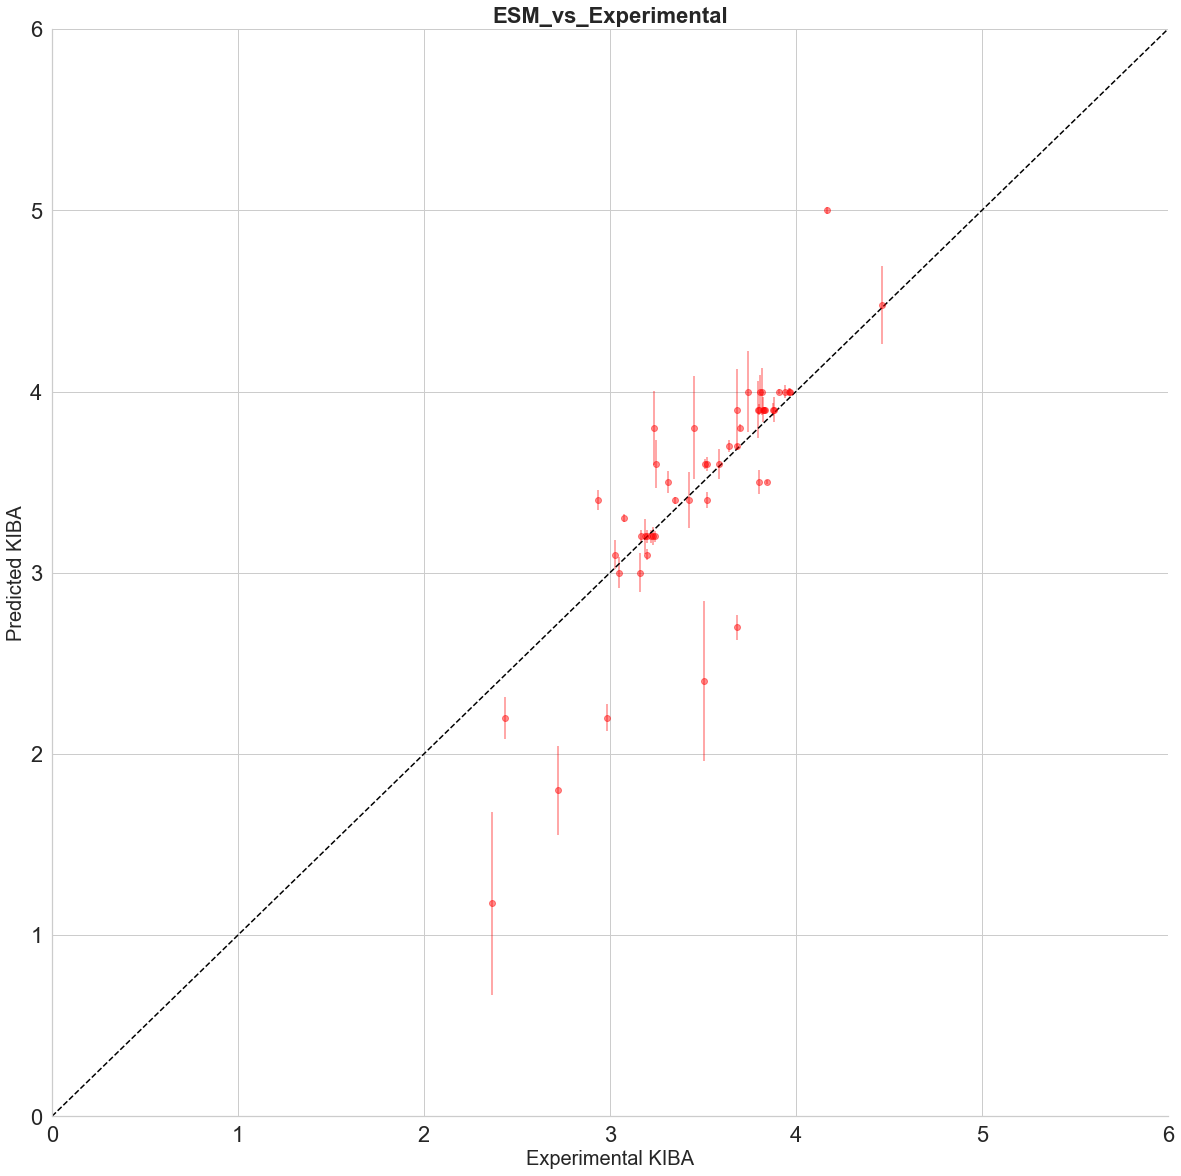

In [36]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.errorbar( y_random2, x_random2, yerr=ers_random2, fmt="o", color="red",alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=20)
ax.set_xlabel('Experimental KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('ESM_vs_Experimental',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'ESM vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'ESM vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

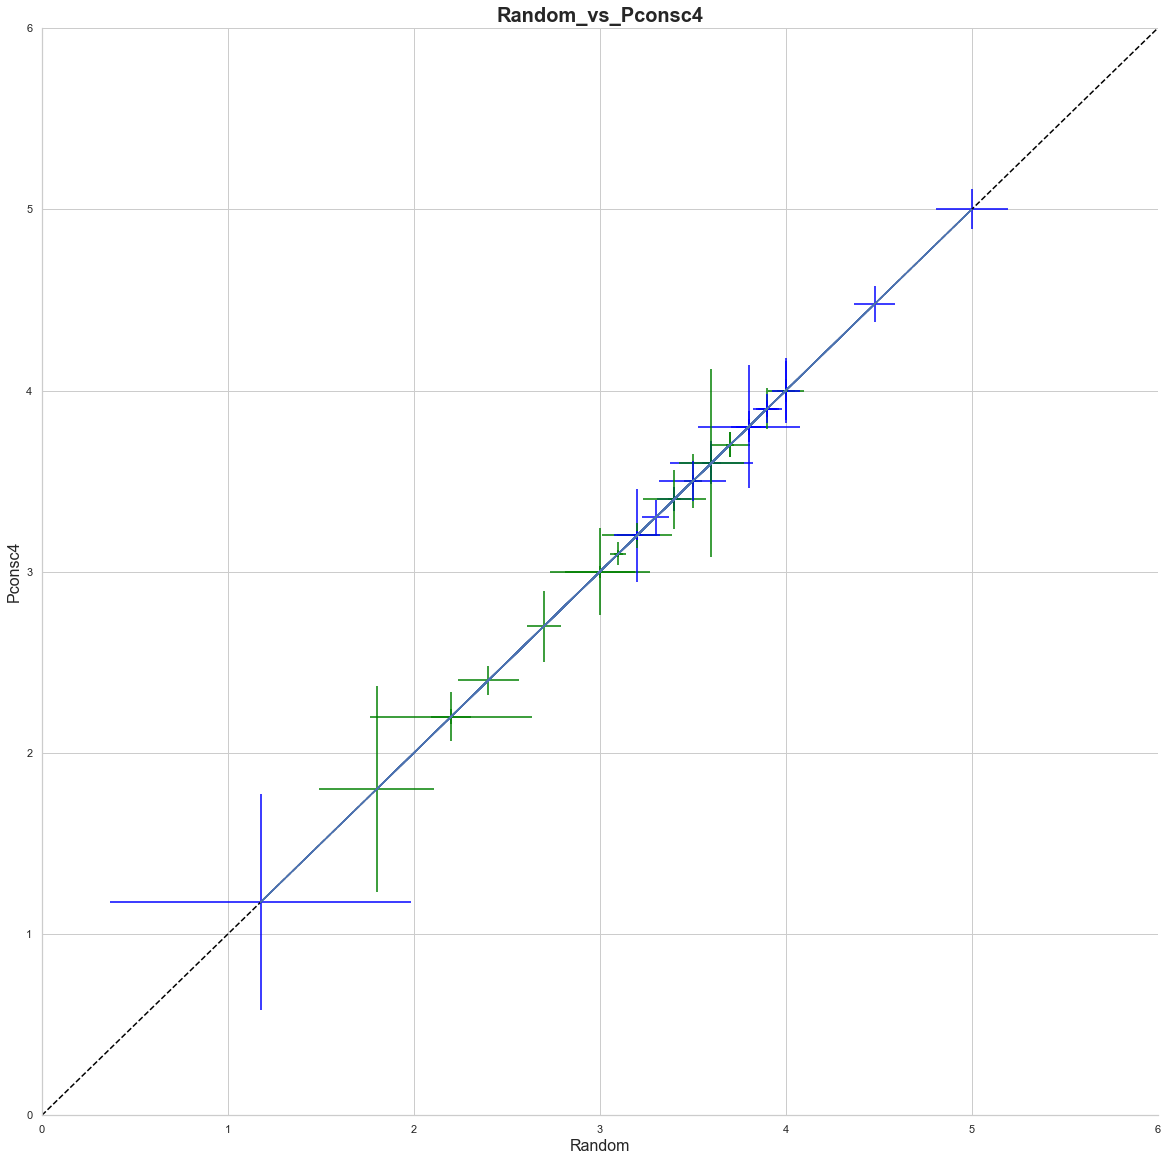

In [47]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.errorbar( x_random, x_random1,xerr=ers_random, yerr=ers_random1, fmt="b", ecolor=['green','blue'],alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4',fontsize=20)
ax.set_xlabel('Random',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Pconsc4 vs Random',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results',  'Pconsc4 vs Random' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results',  'Pconsc4 vs Random' + '.pdf'), dpi=500, bbox_inches='tight')

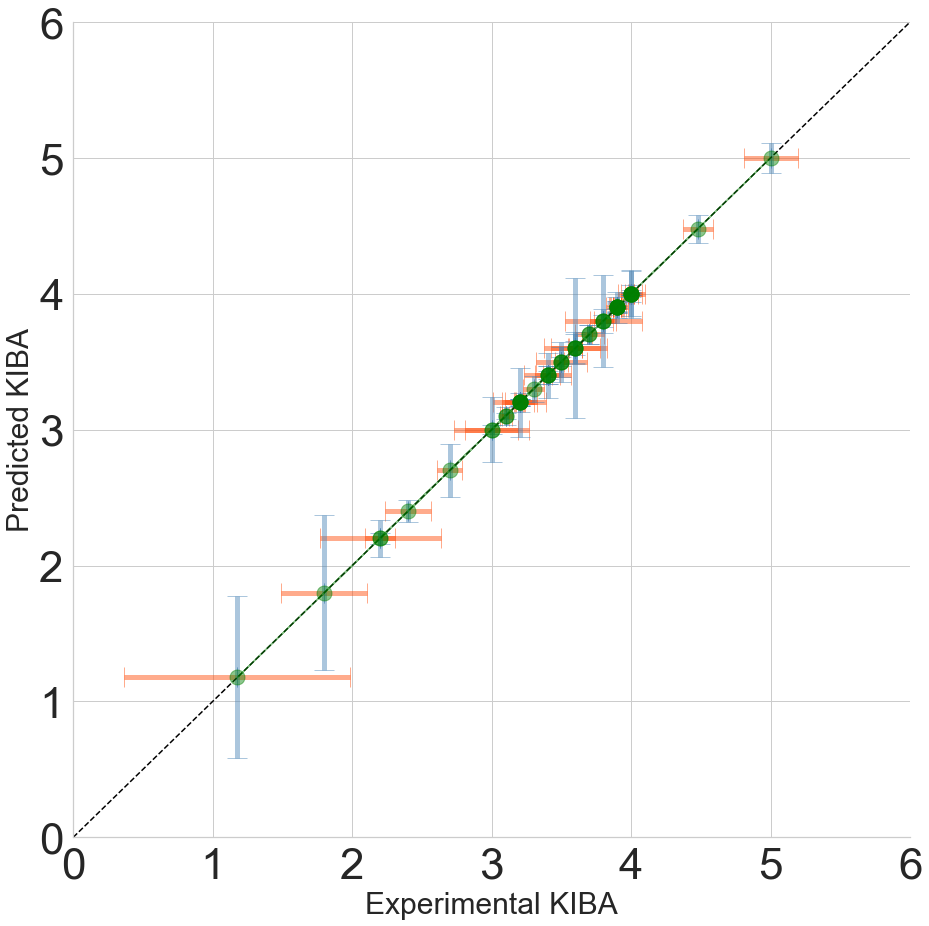

In [31]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(x_random, x_random1, xerr=ers_random,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
ax.errorbar(x_random, x_random1, xerr=0, yerr=ers_random1, fmt='', color = 'green', 
            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Predicted KIBA',fontsize=30)
ax.set_xlabel('Experimental KIBA',fontsize=30)
leg = plt.gca().get_legend()
f.savefig(os.path.join('results4',  'Pconsc4 vs Random' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Pconsc4 vs Random' + '.pdf'), dpi=500, bbox_inches='tight')

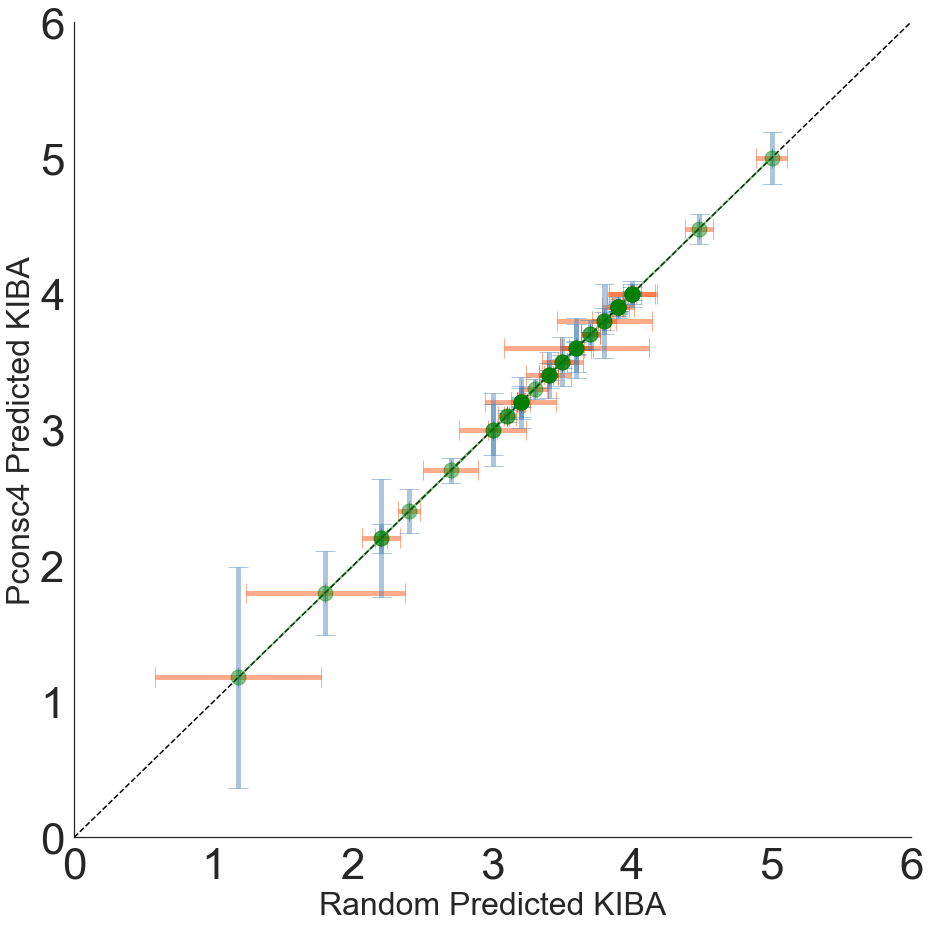

In [40]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(x_random, x_random1, xerr=ers_random1,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
ax.errorbar(x_random, x_random1, xerr=0, yerr=ers_random, fmt='', color = 'green', 
            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4 Predicted KIBA',fontsize=32)
ax.set_xlabel('Random Predicted KIBA',fontsize=32)
leg = plt.gca().get_legend()
f.savefig(os.path.join('results4',  'Pconsc4 vs Random' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Pconsc4 vs Random' + '.pdf'), dpi=500, bbox_inches='tight')

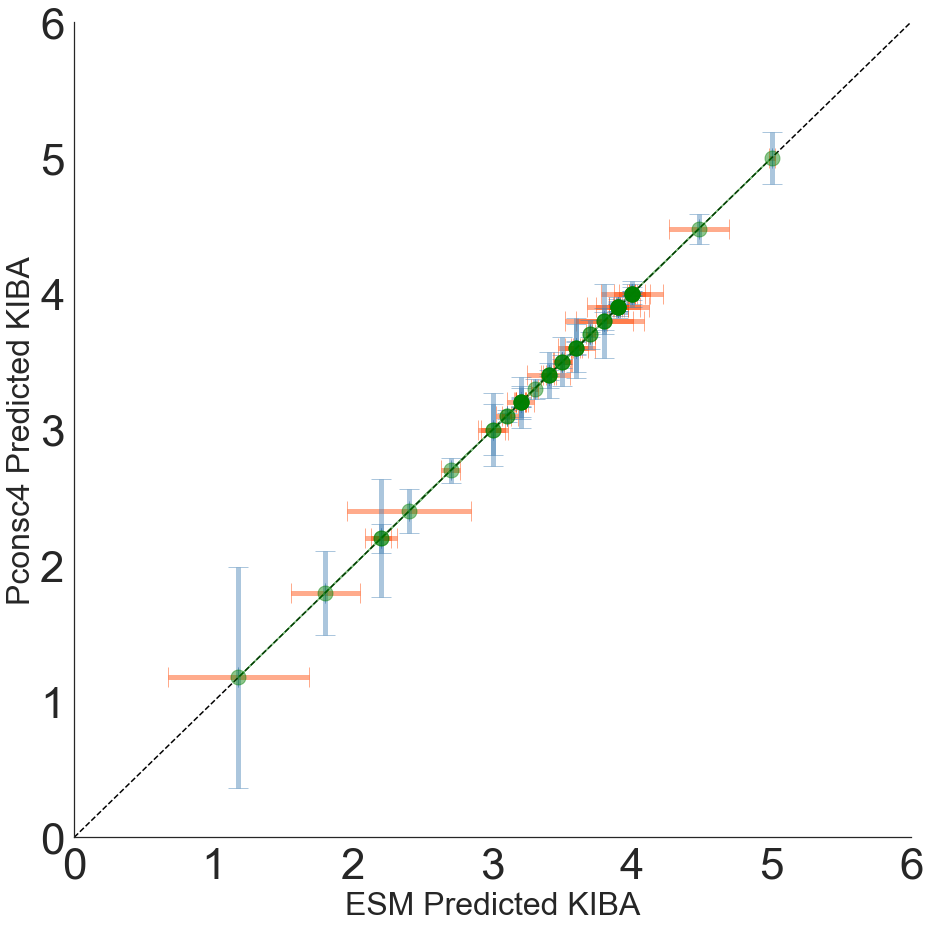

In [41]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(x_random, x_random2, xerr=ers_random2,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
ax.errorbar(x_random, x_random2, xerr=0, yerr=ers_random, fmt='', color = 'green', 
            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4 Predicted KIBA',fontsize=32)
ax.set_xlabel('ESM Predicted KIBA',fontsize=32)
leg = plt.gca().get_legend()
f.savefig(os.path.join('results4',  'Pconsc4 vs ESM' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Pconsc4 vs ESM' + '.pdf'), dpi=500, bbox_inches='tight')

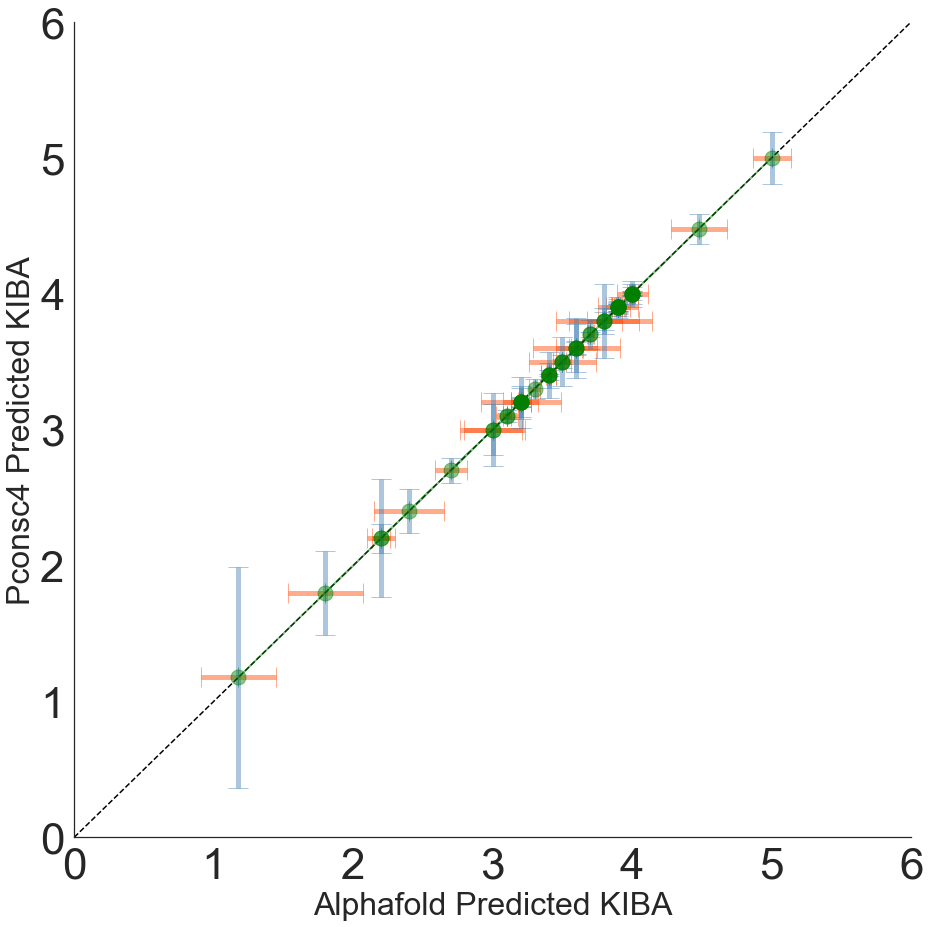

In [42]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(x_random, x_random3, xerr=ers_random3,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
ax.errorbar(x_random, x_random3, xerr=0, yerr=ers_random, fmt='', color = 'green', 
            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4 Predicted KIBA',fontsize=32)
ax.set_xlabel('Alphafold Predicted KIBA',fontsize=32)
leg = plt.gca().get_legend()
f.savefig(os.path.join('results4',  'Pconsc4 vs Alphafold' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Pconsc4 vs Alphafold' + '.pdf'), dpi=500, bbox_inches='tight')

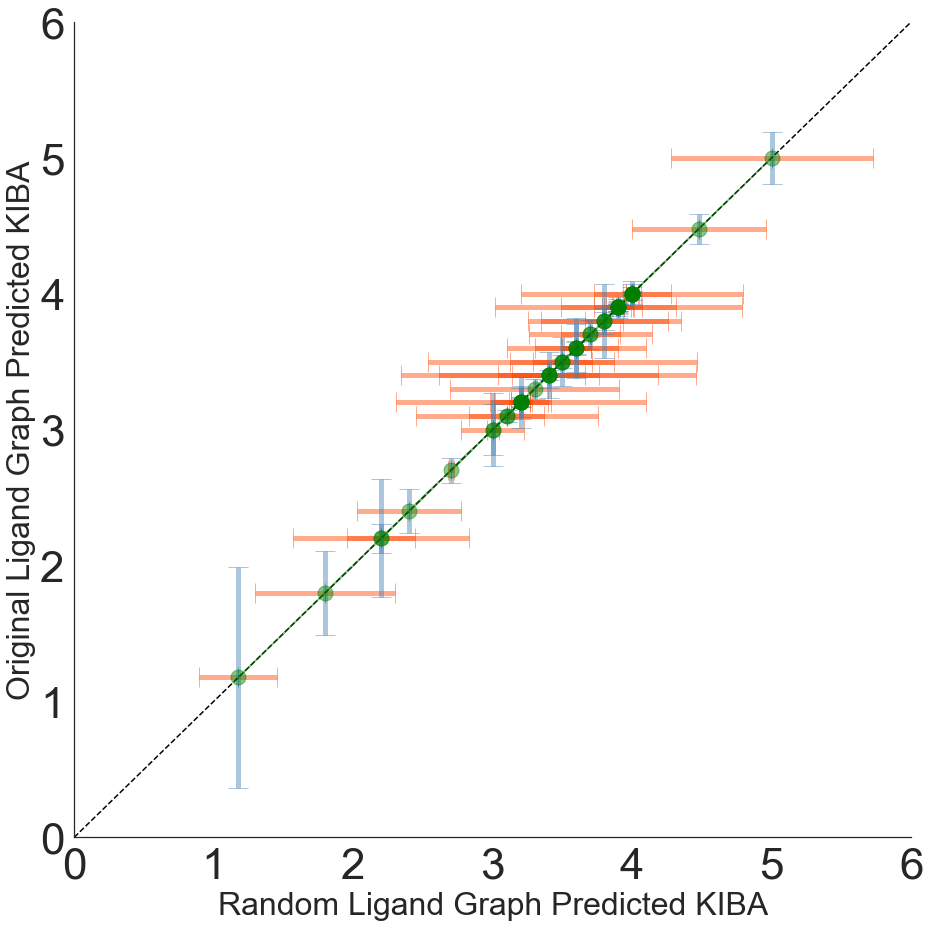

In [43]:
f, ax = plt.subplots(figsize=(15, 15))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.errorbar( y_random3, x_random3, yerr=ers_random3, fmt="o", color="red",alpha=0.45)
ax.errorbar(x_random, x_random4, xerr=ers_random4,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=15,elinewidth = 5, capsize=10,alpha=0.45)

#ax.errorbar(x_random, x_random1, xerr=ers_random, yerr=0, fmt='b', ecolor='b')
ax.errorbar(x_random, x_random4, xerr=0, yerr=ers_random, fmt='', color = 'green', 
            ecolor = 'steelblue', ms=15,elinewidth = 5, capsize=10,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Original Ligand Graph Predicted KIBA',fontsize=32)
ax.set_xlabel('Random Ligand Graph Predicted KIBA',fontsize=32)
leg = plt.gca().get_legend()
f.savefig(os.path.join('results4',  'Original Ligand Graph vs Random Ligand Graph' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results4',  'Original Ligand Graph vs Random Ligand Graph' + '.pdf'), dpi=500, bbox_inches='tight')

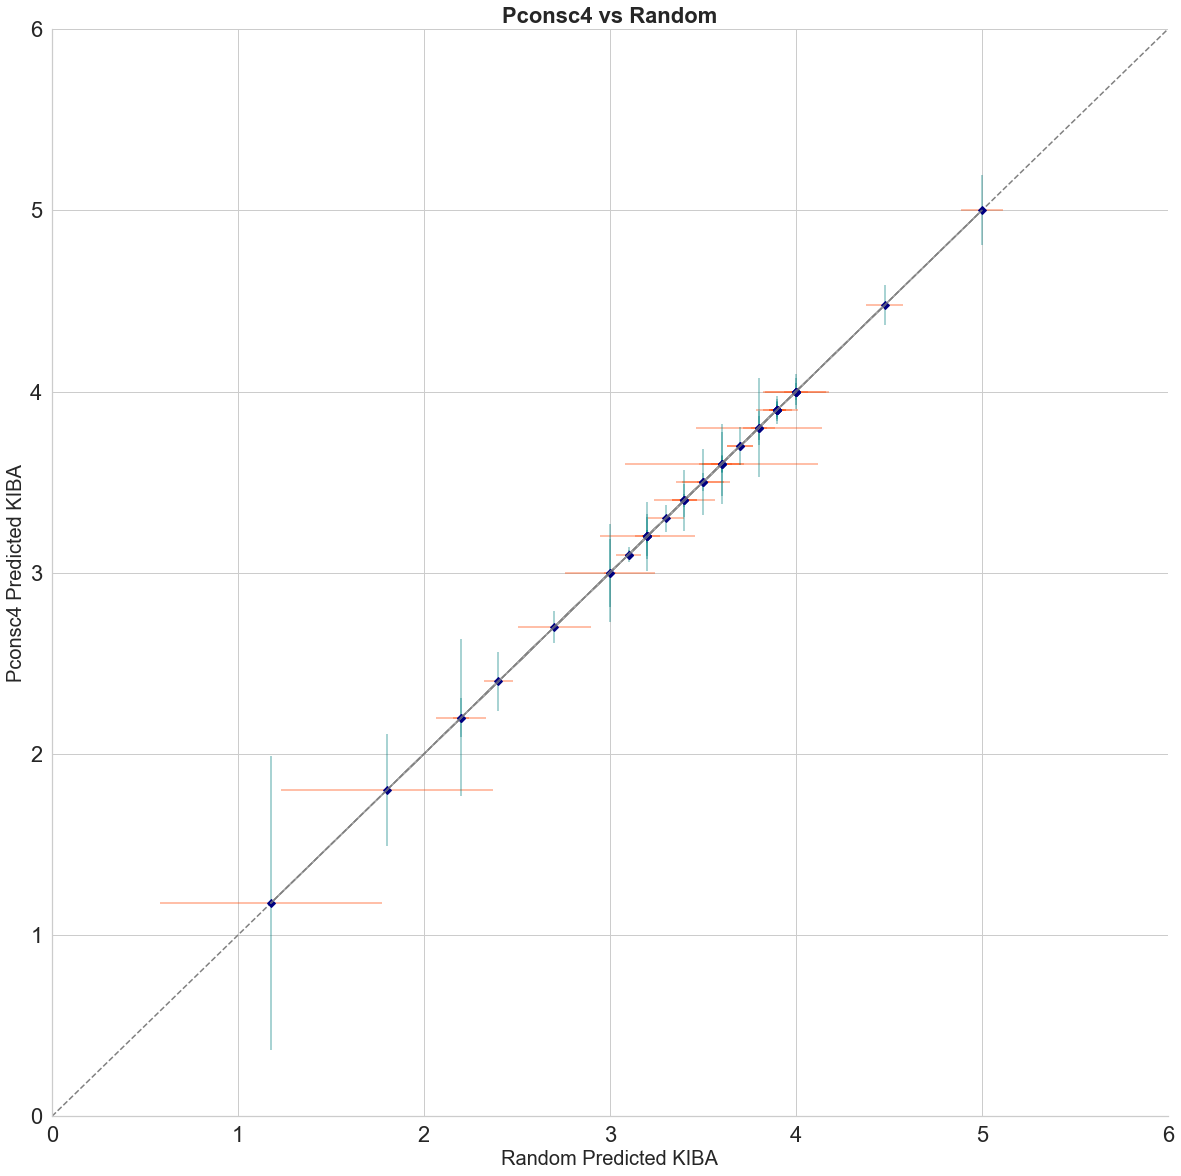

In [38]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot([0, 6], [0, 6], color='grey',linestyle="--")
ax.errorbar(x_random, x_random1, xerr=ers_random1, yerr=0, fmt='grey', ecolor='orangered',alpha=0.45)
ax.errorbar(x_random, x_random1, xerr=0, yerr=ers_random, fmt='grey', ecolor='teal',alpha=0.45)
ax.plot( x_random, x_random1,'D',color='navy')
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4 Predicted KIBA',fontsize=20)
ax.set_xlabel('Random Predicted KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Pconsc4 vs Random',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'Pconsc4 vs Random' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'Pconsc4 vs Random' + '.pdf'), dpi=500, bbox_inches='tight')

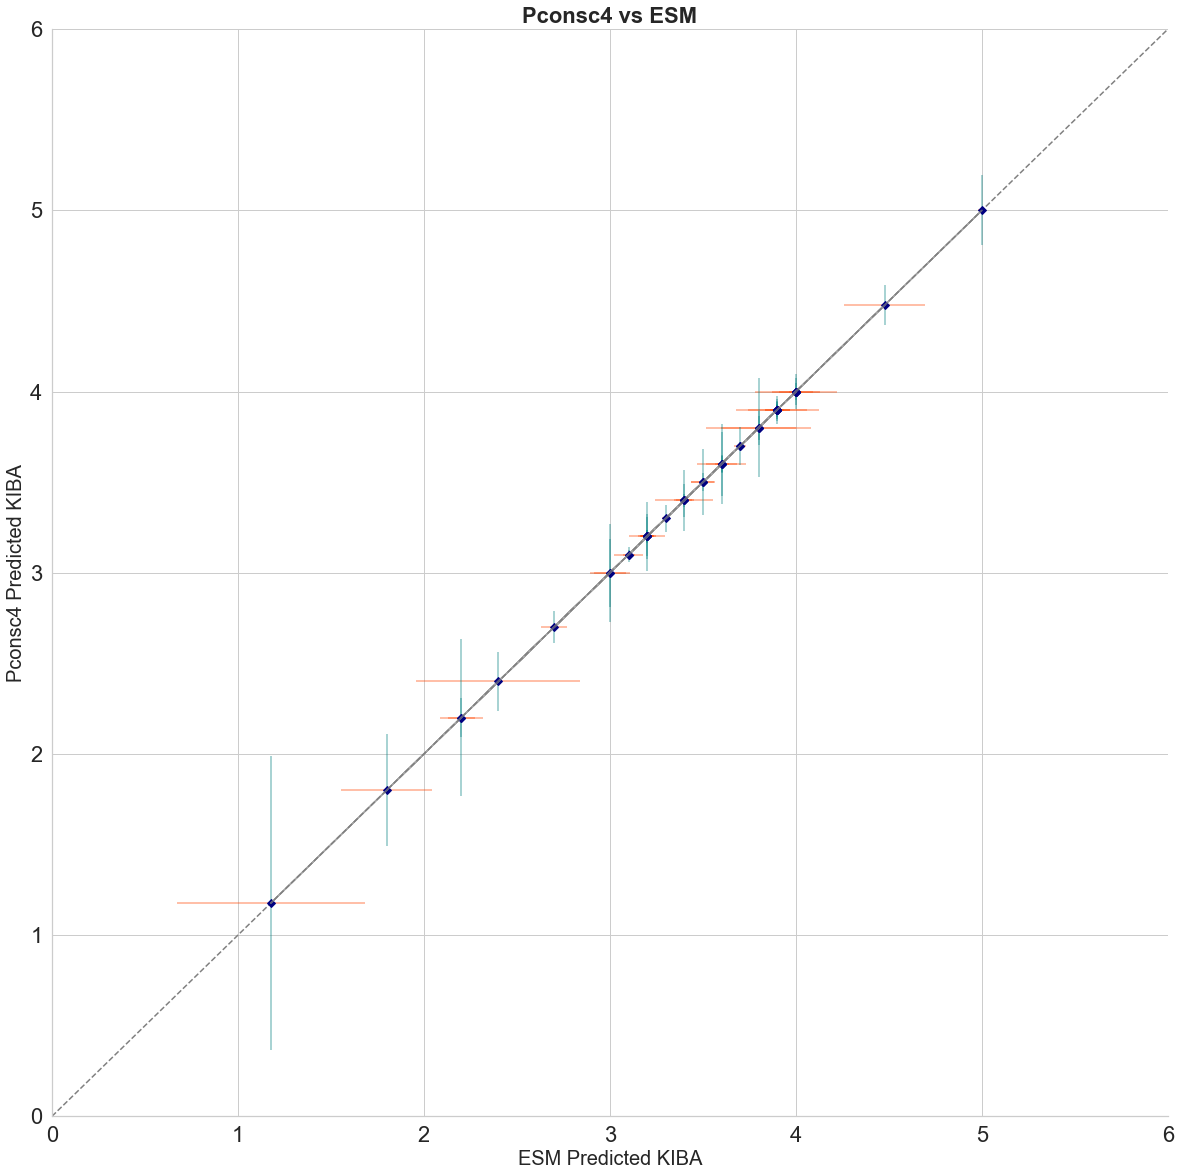

In [39]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot([0, 6], [0, 6], color='grey',linestyle="--")
ax.errorbar(x_random, x_random2, xerr=ers_random2, yerr=0, fmt='grey', ecolor='orangered',alpha=0.45)
ax.errorbar(x_random, x_random2, xerr=0, yerr=ers_random, fmt='grey', ecolor='teal',alpha=0.45)
ax.plot( x_random, x_random1,'D',color='navy')
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4 Predicted KIBA',fontsize=20)
ax.set_xlabel('ESM Predicted KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Pconsc4 vs ESM',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'Pconsc4 vs ESM' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'Pconsc4 vs ESM' + '.pdf'), dpi=500, bbox_inches='tight')

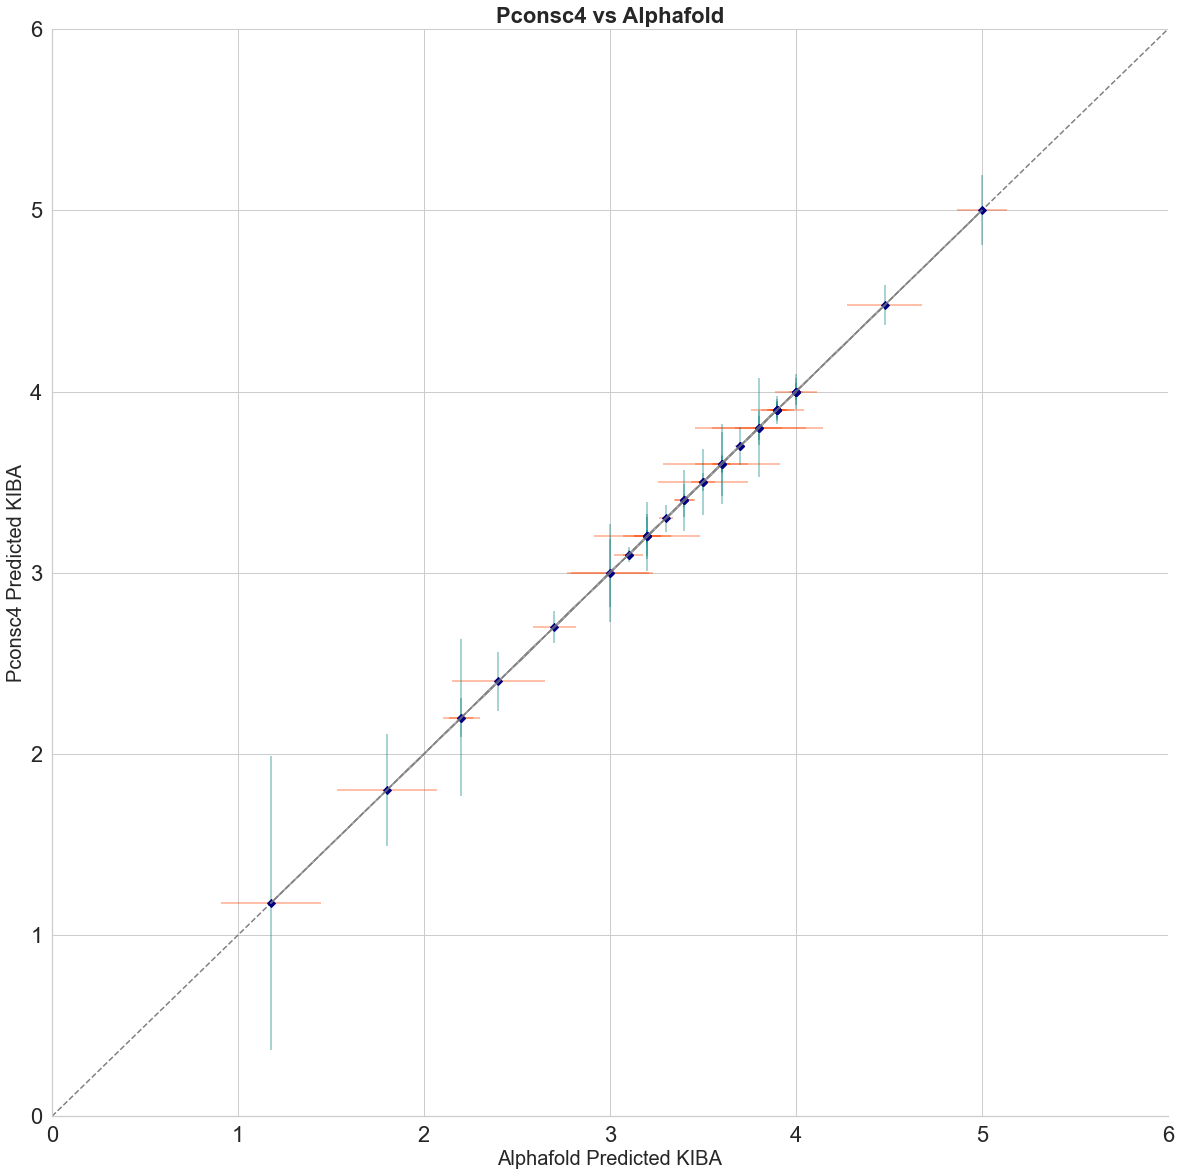

In [40]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot([0, 6], [0, 6], color='grey',linestyle="--")
ax.errorbar(x_random, x_random3, xerr=ers_random3, yerr=0, fmt='grey', ecolor='orangered',alpha=0.45)
ax.errorbar(x_random, x_random3, xerr=0, yerr=ers_random, fmt='grey', ecolor='teal',alpha=0.45)
ax.plot( x_random, x_random1,'D',color='navy')
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Pconsc4 Predicted KIBA',fontsize=20)
ax.set_xlabel('Alphafold Predicted KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Pconsc4 vs Alphafold',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results1',  'Pconsc4 vs Alphafold' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results1',  'Pconsc4 vs Alphafold' + '.pdf'), dpi=500, bbox_inches='tight')

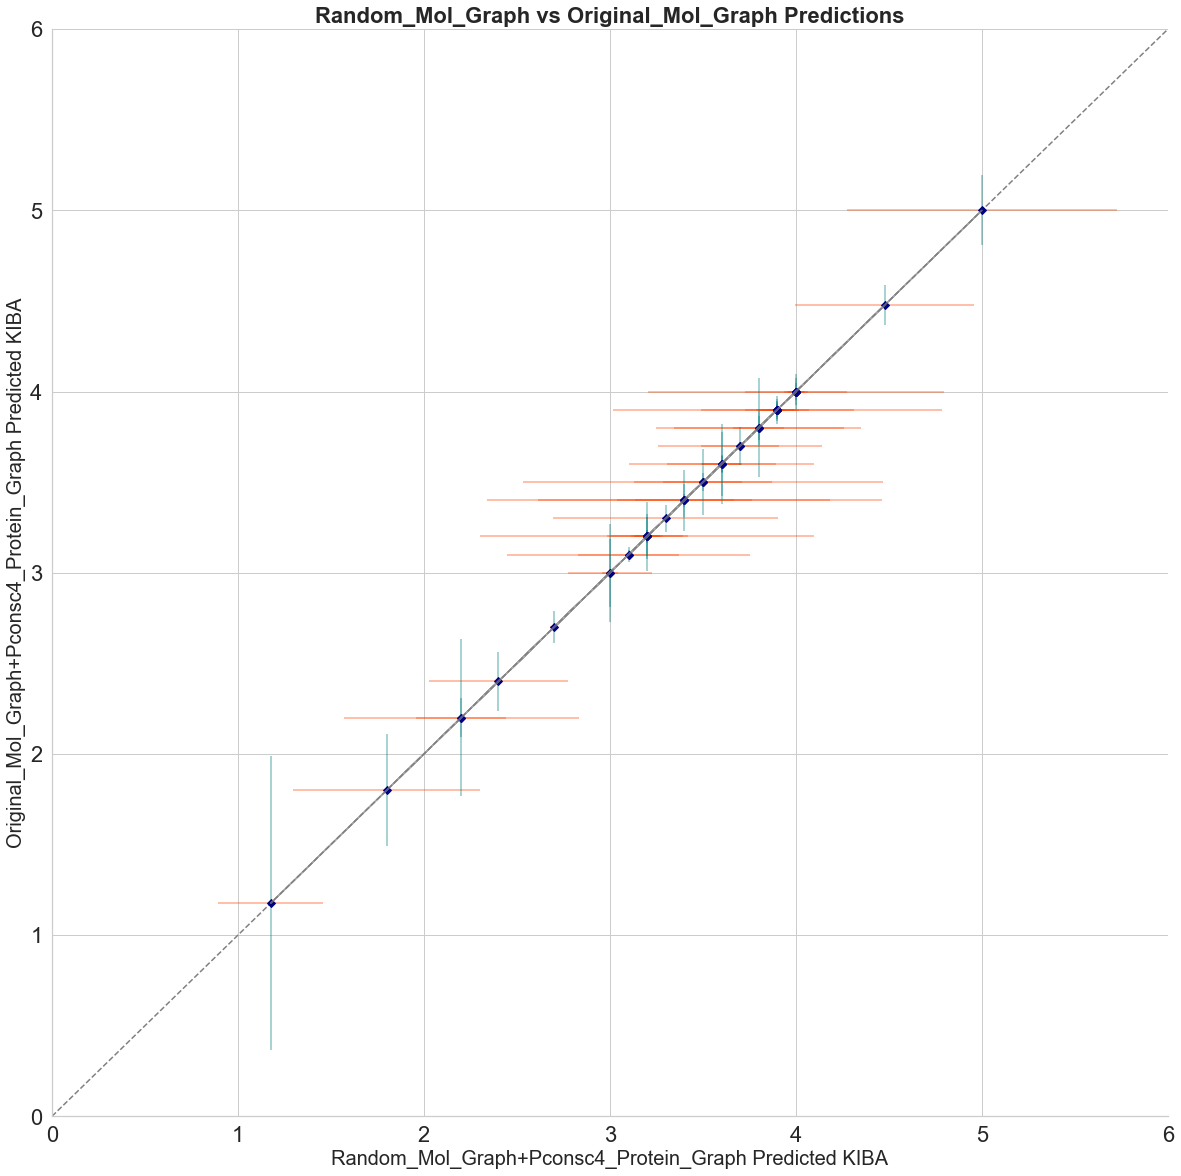

In [41]:
f, ax = plt.subplots(figsize=(20, 20))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot([0, 6], [0, 6], color='grey',linestyle="--")
ax.errorbar(x_random, x_random4, xerr=ers_random4, yerr=0, fmt='grey', ecolor='orangered',alpha=0.45)
ax.errorbar(x_random, x_random4, xerr=0, yerr=ers_random, fmt='grey', ecolor='teal',alpha=0.45)
ax.plot( x_random, x_random4,'D',color='navy')
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('Original_Mol_Graph+Pconsc4_Protein_Graph Predicted KIBA',fontsize=20)
ax.set_xlabel('Random_Mol_Graph+Pconsc4_Protein_Graph Predicted KIBA',fontsize=20)
leg = plt.gca().get_legend()
#ltext = leg.get_texts()
ax.set_title('Random_Mol_Graph vs Original_Mol_Graph Predictions',fontsize=22,fontweight='bold')  
plt.show()
f.savefig(os.path.join('results',  'Random_Mol_Graph vs Original_Mol_Graph Predictions' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results',  'Random_Mol_Graph vs Original_Mol_Graph Predictions' + '.pdf'), dpi=500, bbox_inches='tight')